<a href="https://colab.research.google.com/github/BimantaraDwiCahyo/PCVK_2024_07/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
cara sebagai berikut.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

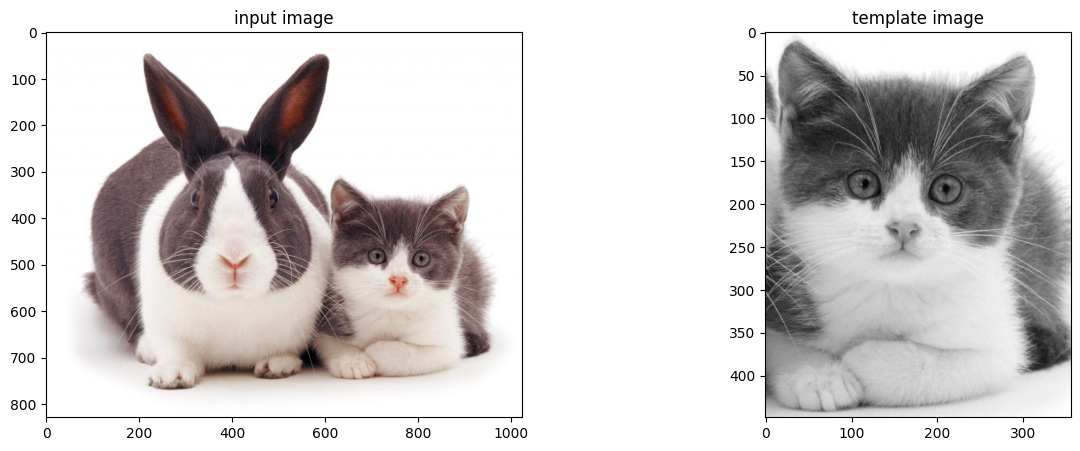

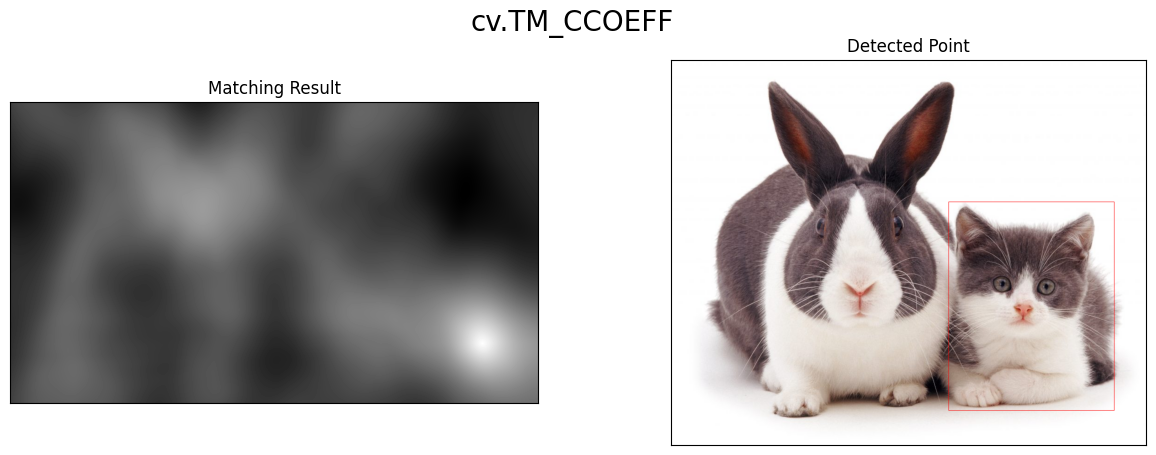

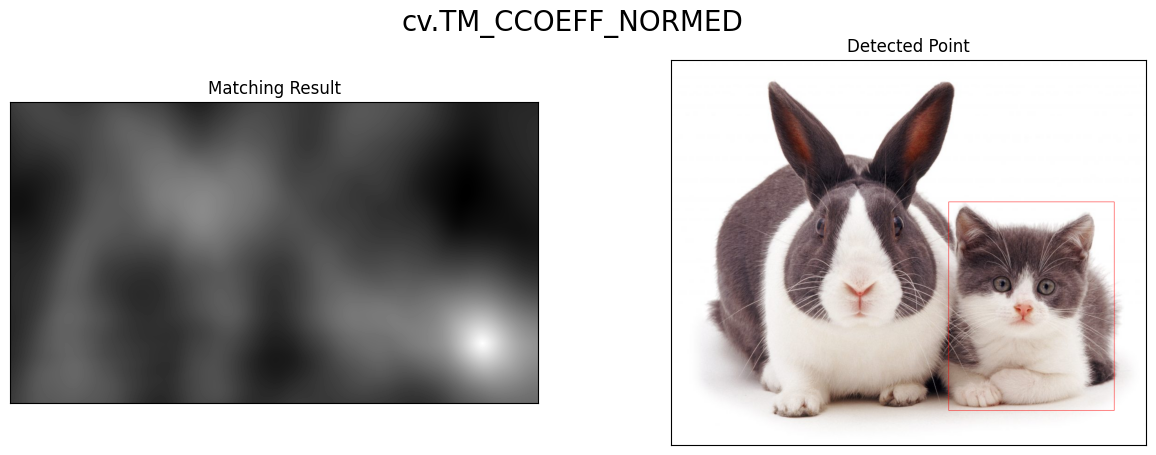

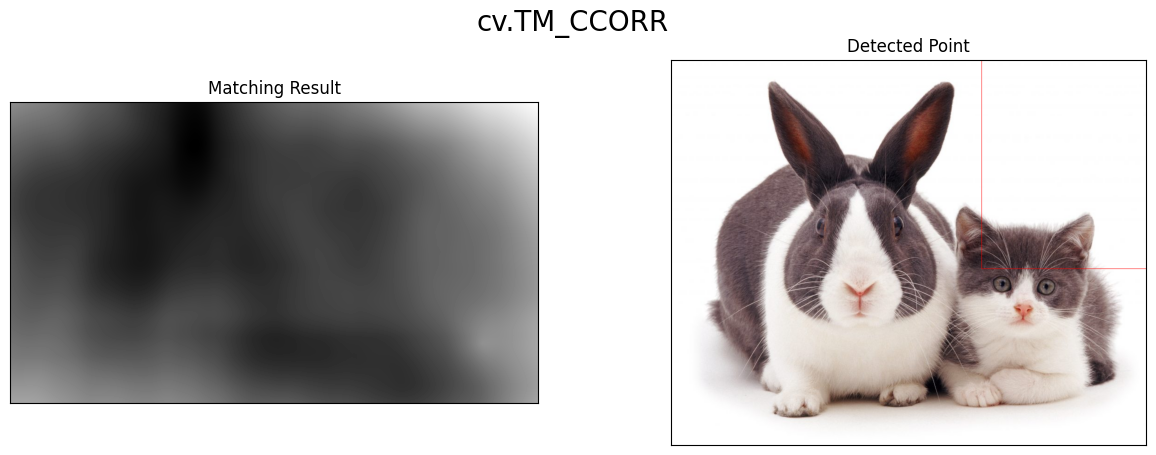

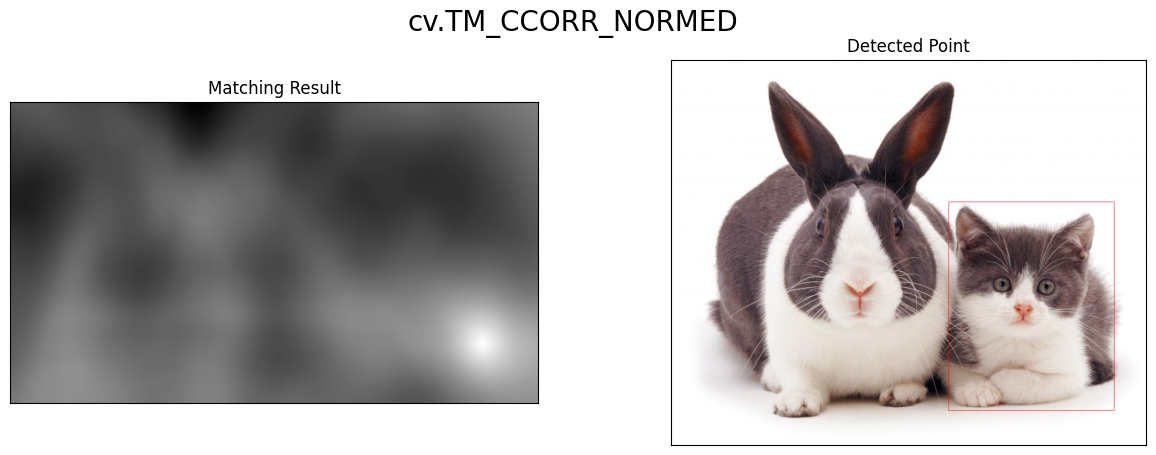

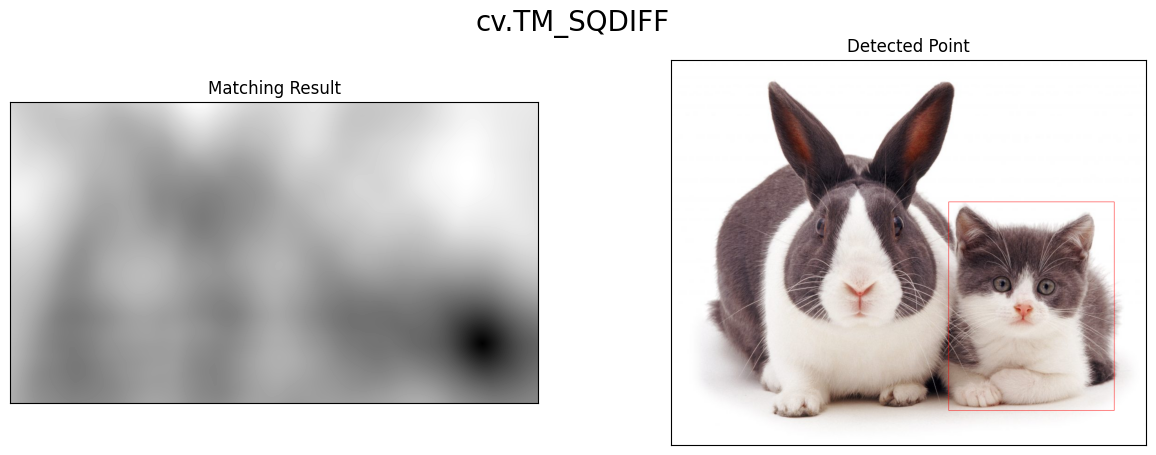

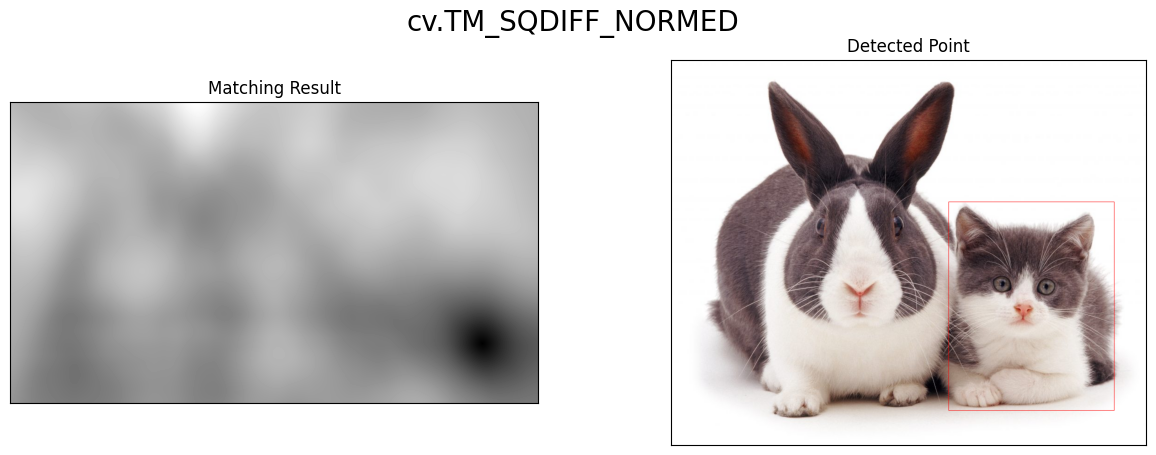

In [3]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Week11/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

total objects found  6


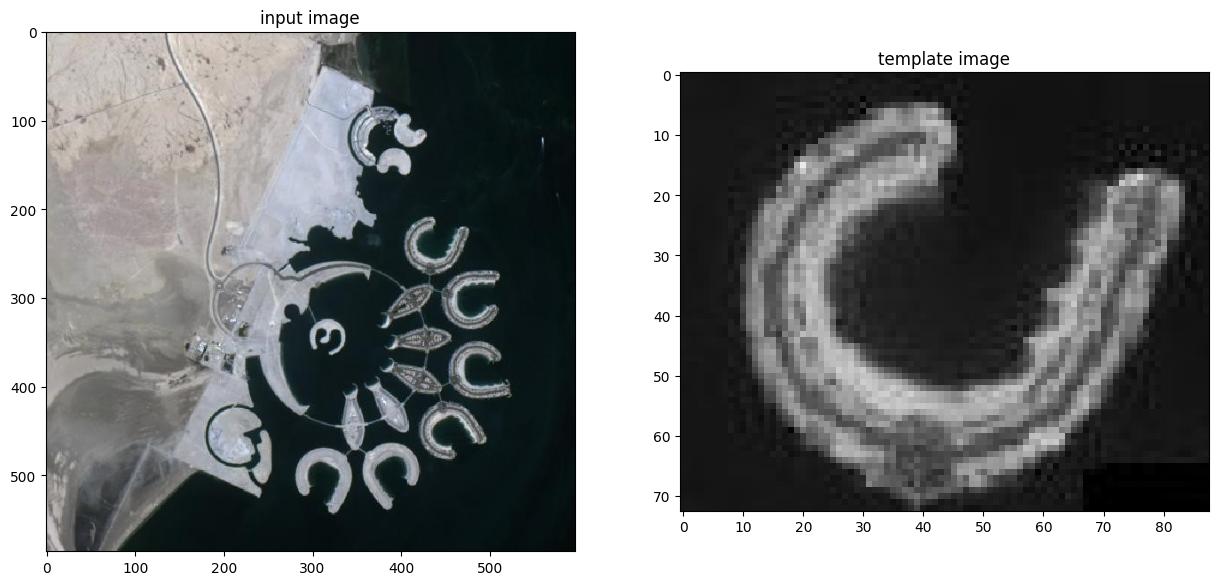

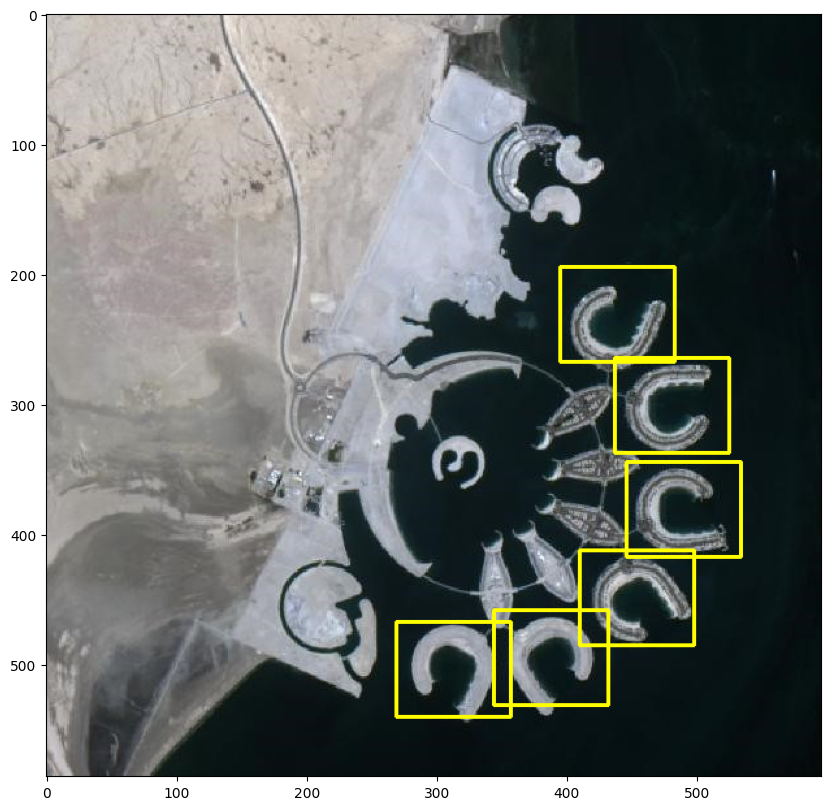

In [4]:
#load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/bahrain.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Week11/bahrain-template.jpg',0)
#dimensi citra
w, h = template.shape[::-1]

f, axarr = plt.subplots(1,2,figsize=(15,35)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)

threshold = 0.45
loc = np.where( res >= threshold)

#membuat 2 list untuk menampung koordinat x,y dan variable count untuk menampung jumlah objek
lspoint=[]
lspoint2=[]
count = 0

for pt in zip(*loc[::-1]):
	#cek apakah koordinat sudah terdapat pada list, jika sudah.. skip
	if pt[0] not in lspoint and pt[1] not in lspoint2:
		##menggambar kotak batas
		cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
		for i in range(((pt[0])-9), ((pt[0])+9),1):
			#masukkan koordinat x
			lspoint.append(i)
		for k in range(((pt[1])-9), ((pt[1])+9),1):
			#masukkan koordinat y
			lspoint2.append(k)
		count+=1
	else:
		continue
print ("total objects found ", count)

plt.figure(figsize=(10,45))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

      a. Sobel Edge Detection

      b. Canny Edge Detection

      c. Laplacian Edge Detection

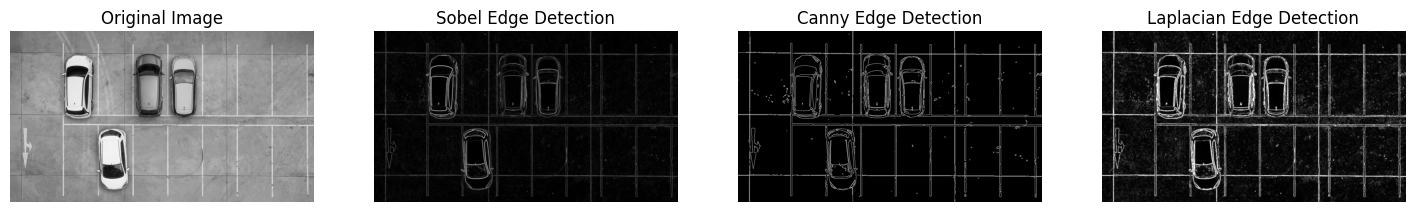

In [5]:
# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/car-park.jpg', cv.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # Sobel Y
sobel_combined = cv.magnitude(sobel_x, sobel_y)    # Combined Sobel

# Canny Edge Detection
canny_edges = cv.Canny(img, 100, 200)

# Laplacian Edge Detection
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=3)
laplacian_abs = cv.convertScaleAbs(laplacian)  # Convert to absolute scale

# Plot the images
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Sobel Edge Detection
plt.subplot(1, 4, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# Canny Edge Detection
plt.subplot(1, 4, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

# Laplacian Edge Detection
plt.subplot(1, 4, 4)
plt.imshow(laplacian_abs, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

  a. Harris Corner Detection
  
  b. Shi-Tomasi Detection

<ipython-input-6-3c1842851c87>:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  shi_tomasi_corners = np.int0(shi_tomasi_corners)


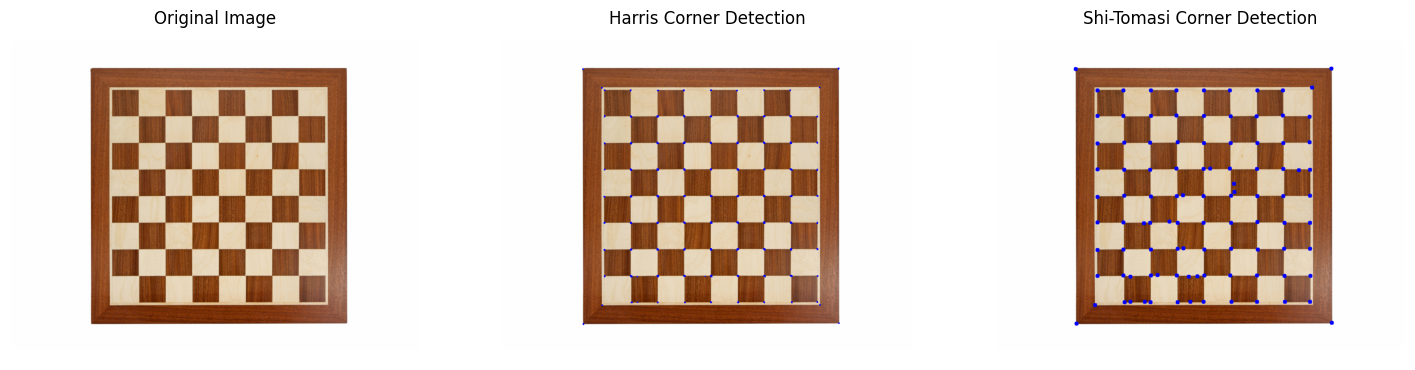

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
gray_harris = np.float32(gray)
harris_corners = cv.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)
harris_dilated = cv.dilate(harris_corners, None)  # Dilate for marking corners

# Threshold for Harris - mark corners in red
img_harris = img.copy()
img_harris[harris_dilated > 0.01 * harris_dilated.max()] = [255, 0, 0]
# Shi-Tomasi Corner Detection (Good Features to Track)
shi_tomasi_corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_corners = np.int0(shi_tomasi_corners)

img_shi_tomasi = img.copy()
for i in shi_tomasi_corners:
    x, y = i.ravel()
    cv.circle(img_shi_tomasi, (x, y), 5, (255, 0, 0), -1)

# Plot the images
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Harris Corner Detection Image
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(img_harris, cv.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis('off')

# Shi-Tomasi Corner Detection Image
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(img_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corner Detection")
plt.axis('off')

plt.show()


6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


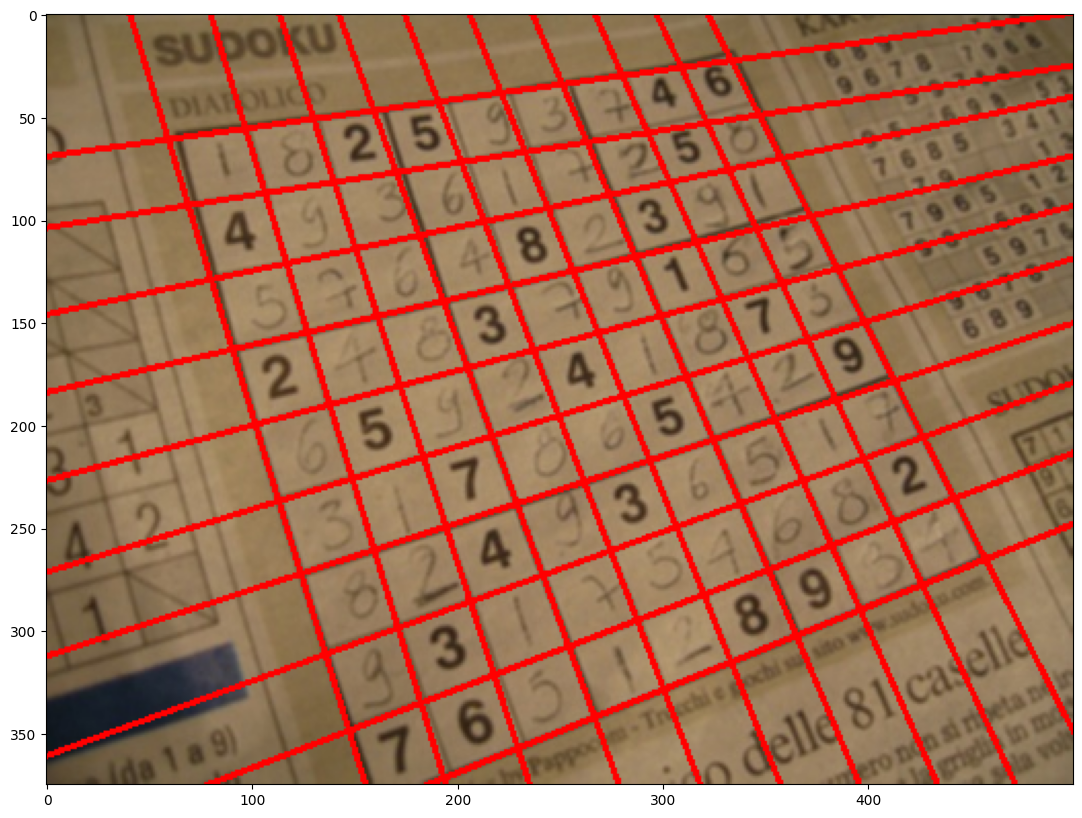

In [7]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Week11/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

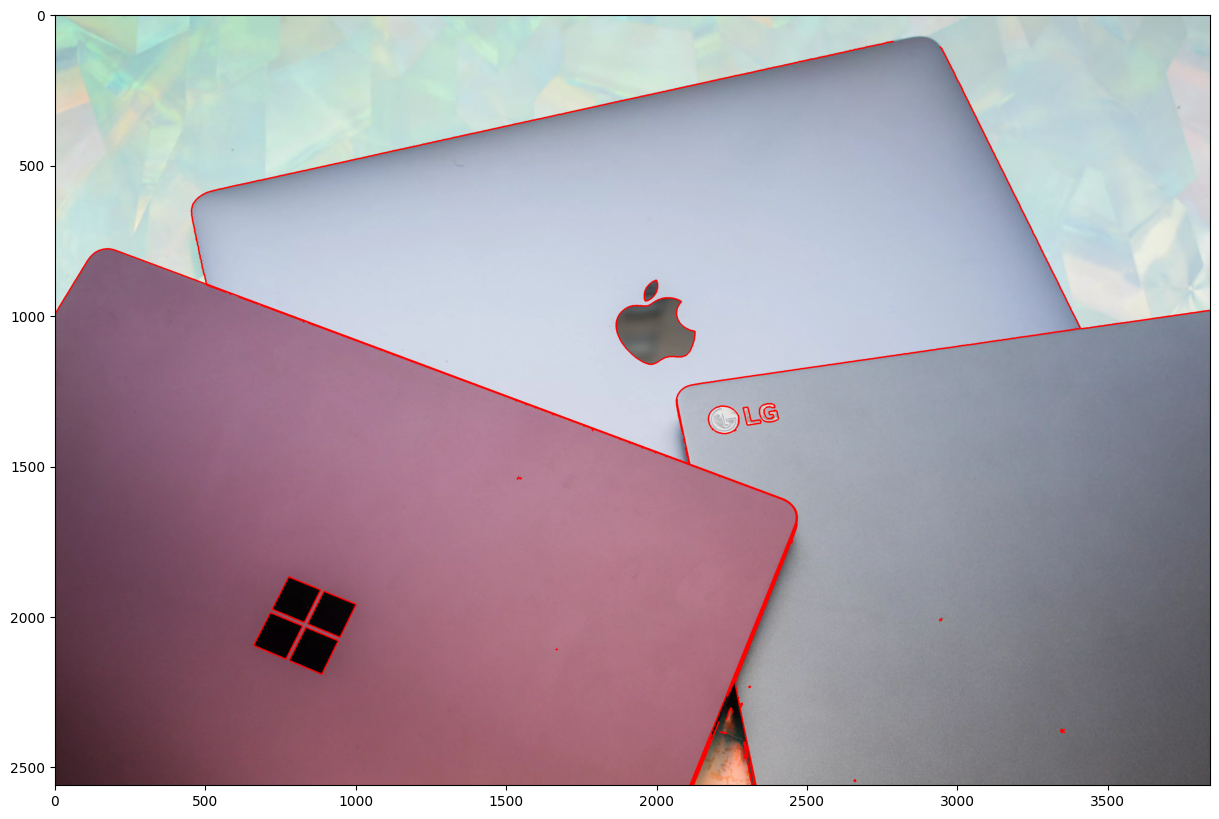

In [8]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Pengayaan Materi KTP

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban
2. Muat 2 library berikut sebagai tahapan persiapan

In [13]:
import cv2
import os

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori
dataset tersebut

In [16]:
src = cv2.imread('/content/drive/MyDrive/PCVK/Week11/ktp3.png')
blurred = src.copy()
gray = blurred.copy()

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle
dapat direduksi

In [17]:
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan
binerisasi citra (thresholding)

168.0 (300, 493)


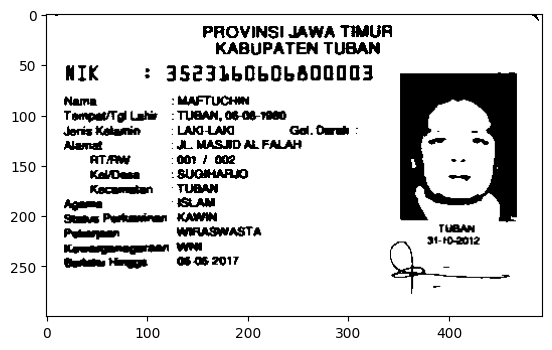

In [18]:
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)
plt.imshow(bw, cmap='gray')

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter
atau obyek tidak berhimpitan.

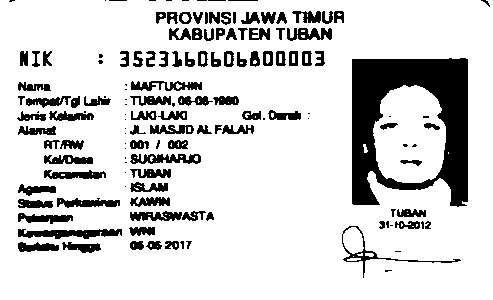

In [19]:
from google.colab.patches import cv2_imshow

# Morfologi menggunakan metode opening
kernel = np.ones((1,1),np.uint8)
open = cv2.morphologyEx(bw,cv2.MORPH_OPEN, kernel)
cv2_imshow(open)

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.
Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu
penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran
dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik
(karena hasil akuisisi setiap citra dapat berbeda).
Hasil

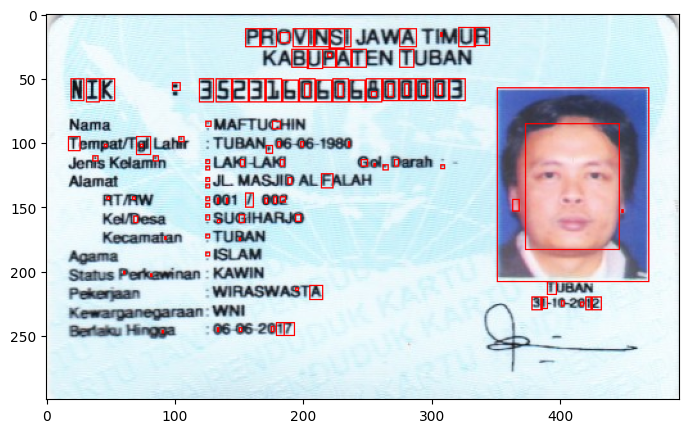

In [20]:
blurred = cv.GaussianBlur(src, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

# Tugas Praktikum

F. Tugas Praktikum

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:

Kelompok 1 – KTP Riyanto Sleman

Kelompok 2 – KTP Galang Raka Bengkulu - Kelompok 2

Kelompok 3 – KTP Arief Wijaya Cimahi

Kelompok 4 – KTP Edo Nias

Kelompok 5 – KTP Widiarso Bekasi

Kelompok 6 – KTP Abdurrauf Soppeng


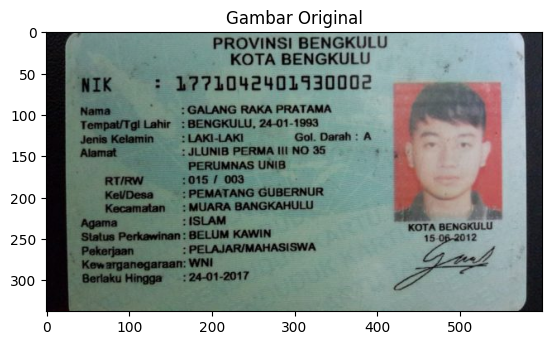

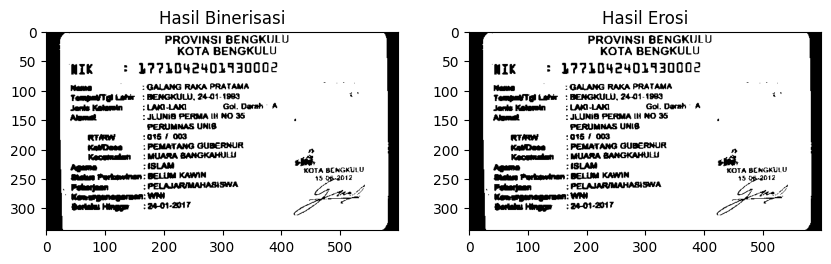

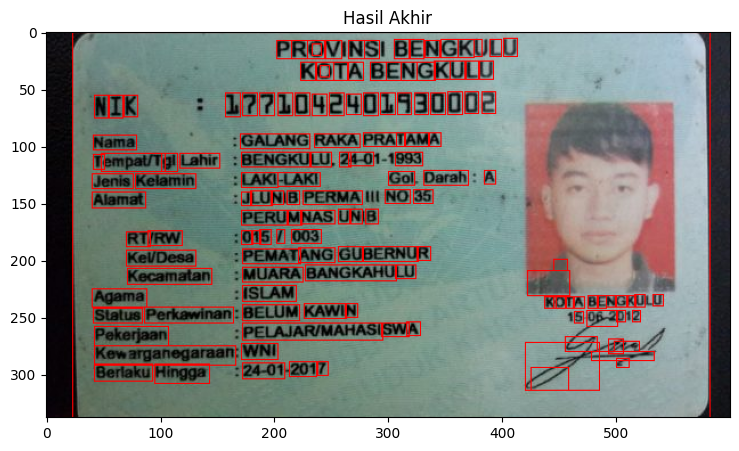

In [23]:
ktpArif = cv2.imread('/content/drive/MyDrive/PCVK/Week11/ktp1.png')
ori = cv.cvtColor(ktpArif.copy(), cv.COLOR_BGR2RGB)

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(ktpArif, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(ktpArif, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(ktpArif, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(ktpArif, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar matplotlib
plt.subplots(1)
plt.title("Gambar Original")
plt.imshow(ori)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Hasil Binerisasi')
axs[0].imshow(bw, cmap='gray')

axs[1].set_title('Hasil Erosi')
axs[1].imshow(erode, cmap='gray')

fig1, axs1 = plt.subplots(figsize=(10, 5))
axs1.set_title('Hasil Akhir')
axs1.imshow(cv.cvtColor(ktpArif, cv.COLOR_BGR2RGB))

plt.show()